# Selecting the Fantasy MVPs

### MSP 9.24.2017

Who are the 2017 hitting and pitching MVPs?

In [1]:
from IPython.display import HTML
HTML('''<script>code_show=true; function code_toggle() { if (code_show){ $('div.input').hide();} else { $('div.input').show(); } code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
# boilerplate imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import matplotlib as mpl



In [2]:
# imports for scraping

from bs4 import BeautifulSoup
import requests


# basic birth year reader. tables[1] has good stuff in it!
def get_birth_year(tables):

    birthdate_start = (tables[1].text).find("Birthdate:")

    birthdate_end =  (tables[1].text).find('(',birthdate_start)

    #print (tables[1].text)[birthdate_start:birthdate_end]
    birth_year = (tables[1].text)[birthdate_start:birthdate_end].split('/')[2]
    #print birth_year
    
    return birth_year





In [3]:
# the listing of the teams of interest (all!)

teams = ['angels','astros','athletics','bluejays','braves',\
        'brewers','cardinals','cubs','diamondbacks','dodgers',\
        'giants','indians','mariners','marlins','mets','nationals',\
        'orioles','padres','phillies','pirates','rangers',\
        'rays','reds','redsox','rockies','royals','tigers','twins',\
        'whitesox','yankees']

# verify we got all the teams...
print len(teams)

30


In [ ]:
# 1: Name
# 2: Team
# 3: W
# 4: L
# 5: ERA
# 6:G
# 7: GS
# 8: CG
# 9: ShO
#10: SV
#11: HLD
#12: BS
#13: IP
#14: TBF
#15: H
#16: R
#17: ER
#18: HR
#19: BB
#20: IBB
#21: HBP
#22: WP
#23: BK
#24: SO

In [67]:
def scrape_saves(year='2018'):

    get_url = 'https://www.fangraphs.com/leaders.aspx?pos=all&stats=pit&lg=all&qual=0&type=0&season='+year+'&month=0&season1='+year+'&ind=0&team=0&rost=0&age=0&filter=&players=0&page=1_1000'
    r  = requests.get(get_url)

    data = r.text

    soup = BeautifulSoup(data)

    tables = soup.findAll('table')

    PDict = {}


    for row in tables[11].find_all("tr")[3:]: 
                #print(tnum)
                try:
                    #sav = [td.find('a') for td in row.find_all("td")][0]
                    sav = [td.get_text() for td in row.find_all("td")]
                    #print(sav)
                    PDict[sav[1]] = [float(sav[10]),float(sav[13]),float(sav[11])]
                except:
                    print('FAILED')

    return PDict

PDict = scrape_saves(year='2017')


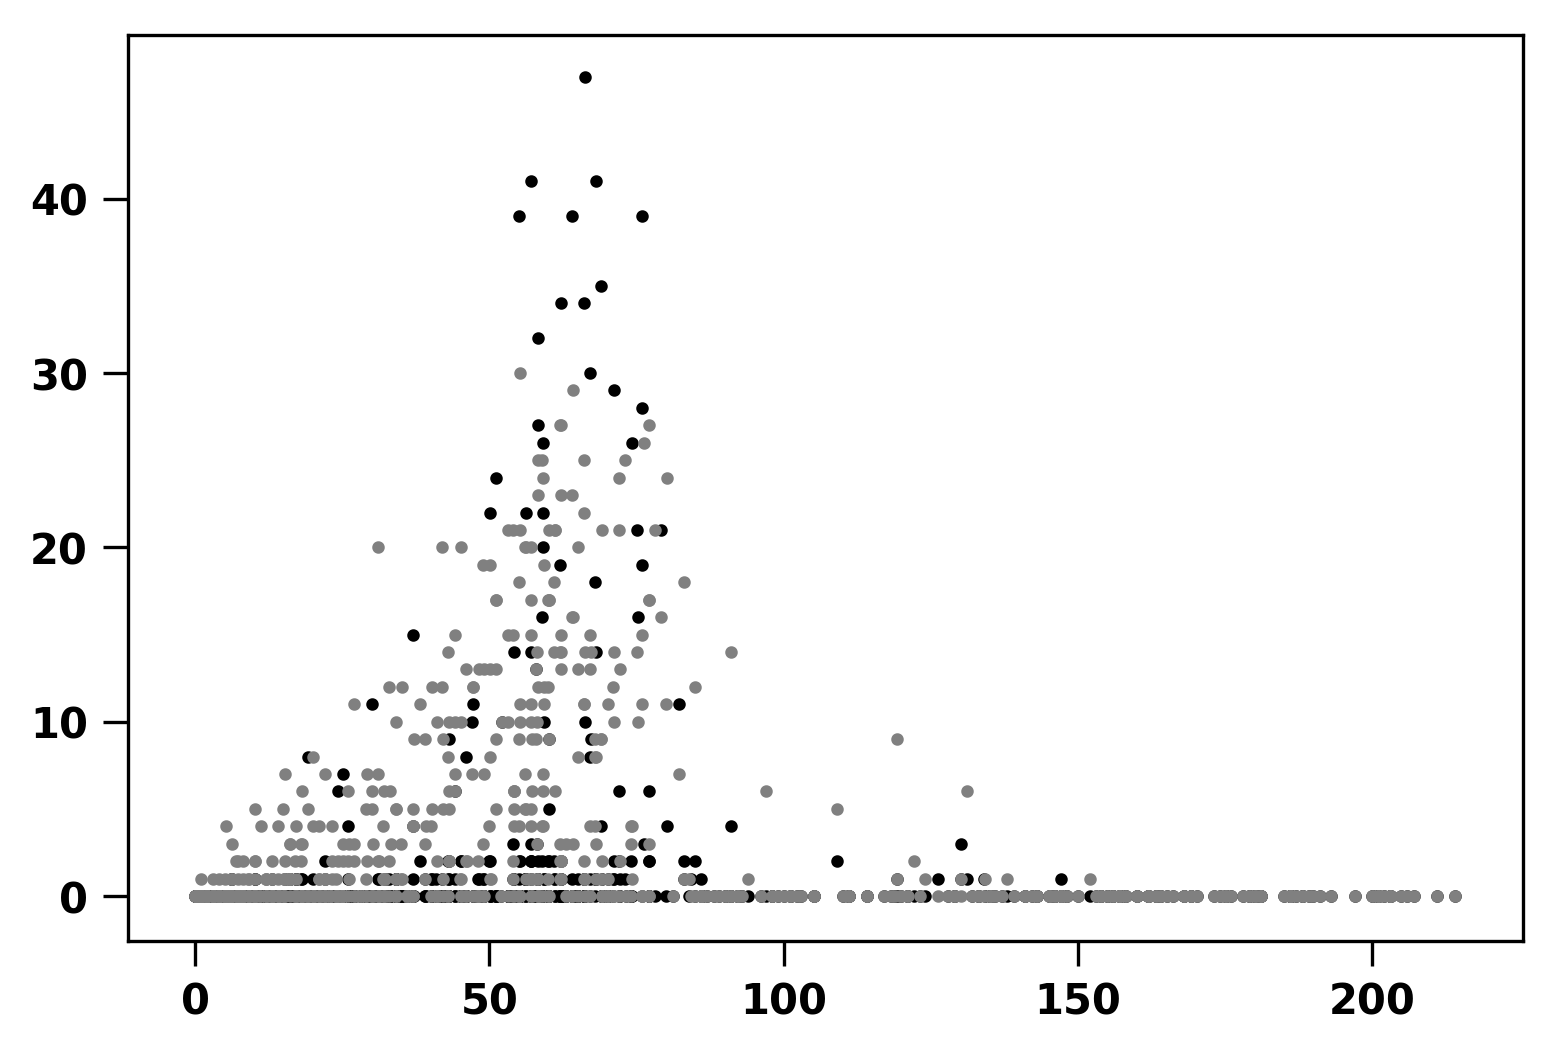

In [68]:
PDict = scrape_saves(year='2017')

plt.scatter(np.array(PDict.values())[:,1],np.array(PDict.values())[:,0],color='black',s=4.)
plt.scatter(np.array(PDict.values())[:,1],np.array(PDict.values())[:,2],color='gray',s=4.)

('2017', 89)
('2016', 85)
('2015', 83)
('2014', 79)


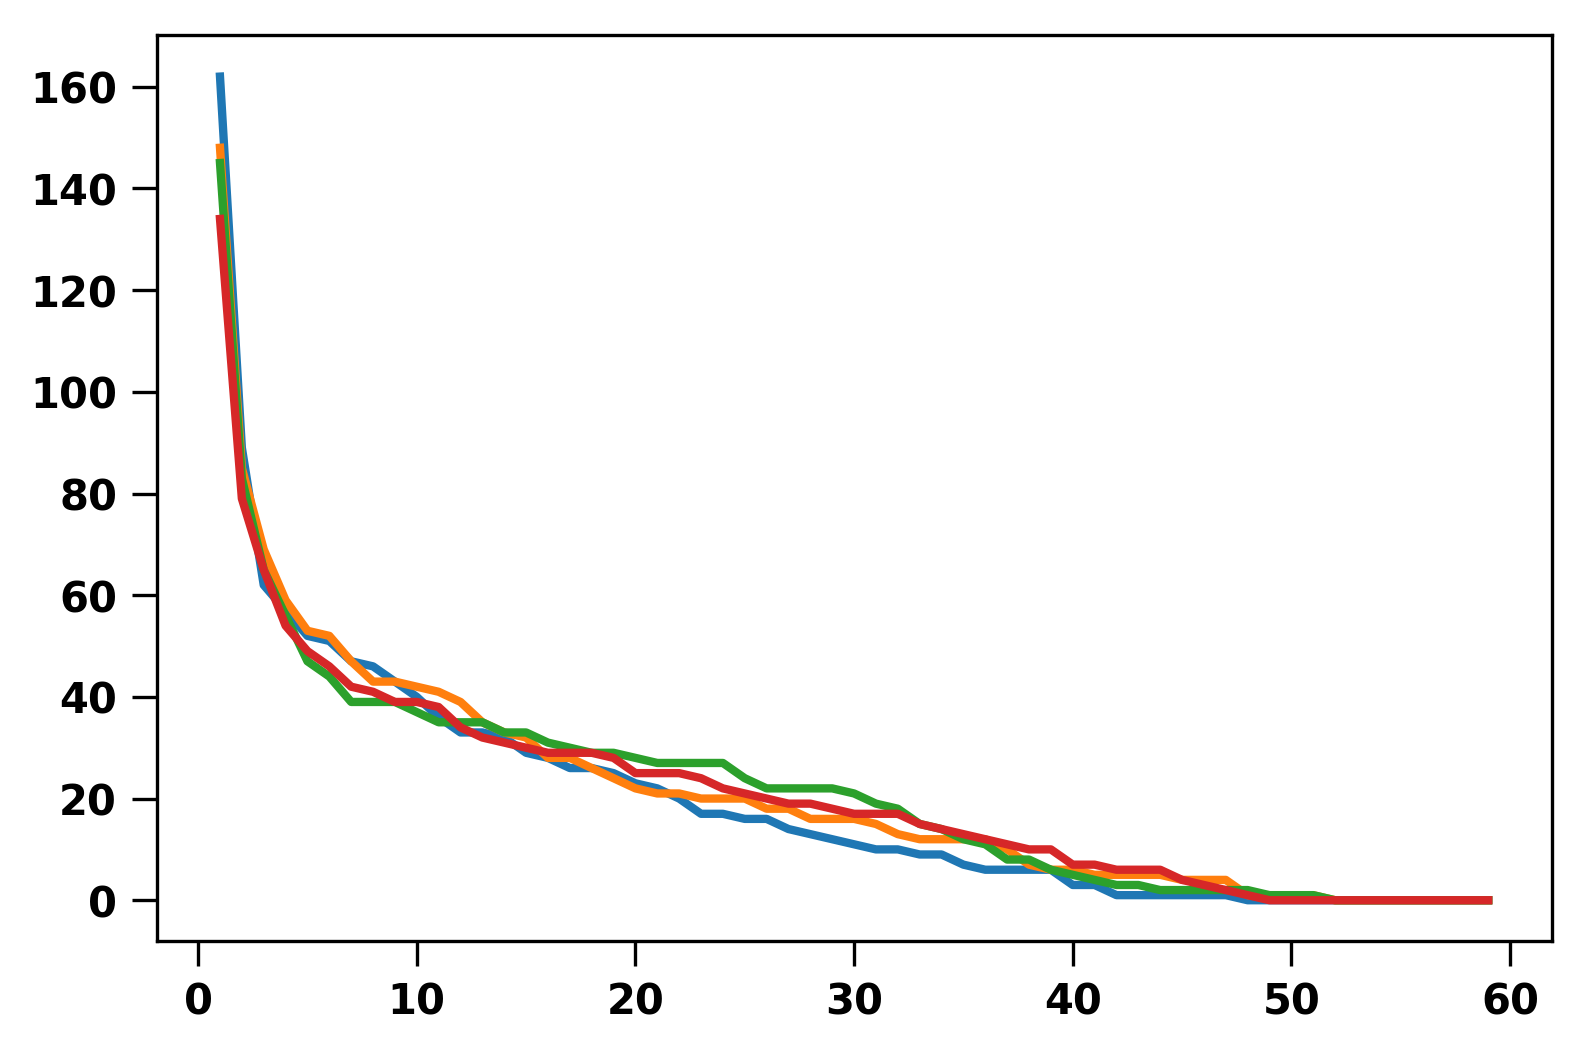

In [51]:

nsaves = np.arange(1,60,1)

PDict = scrape_saves(year='2017')
print('2017',len(np.where(np.array(PDict.values()) > 1.)[0]))



nplayers = np.zeros_like(nsaves)

for indx,n in enumerate(nsaves):
    nplayers[indx] = len(np.where(np.array(PDict.values())[:,0] >= n)[0])
    
plt.plot(nsaves,nplayers)

PDict = scrape_saves(year='2016')
print('2016',len(np.where(np.array(PDict.values()) > 1.)[0]))



nplayers = np.zeros_like(nsaves)

for indx,n in enumerate(nsaves):
    nplayers[indx] = len(np.where(np.array(PDict.values()) >= n)[0])
    
plt.plot(nsaves,nplayers)
    
    
PDict = scrape_saves(year='2015')
print('2015',len(np.where(np.array(PDict.values()) > 1.)[0]))

nplayers = np.zeros_like(nsaves)

for indx,n in enumerate(nsaves):
    nplayers[indx] = len(np.where(np.array(PDict.values()) >= n)[0])
    
plt.plot(nsaves,nplayers)
    
    
PDict = scrape_saves(year='2014')
print('2014',len(np.where(np.array(PDict.values()) > 1.)[0]))

nplayers = np.zeros_like(nsaves)

for indx,n in enumerate(nsaves):
    nplayers[indx] = len(np.where(np.array(PDict.values()) >= n)[0])
    
plt.plot(nsaves,nplayers)
    

#### Compile Hitters

This cell only needs to be run in the event that player ID numbers change, or new players are added.

In [13]:
#
# make hitter dictionary
#
HDict = {}


for team in teams:
    
    print team,
    
    get_url = 'http://www.fangraphs.com/teams/'+team#angels'

    r  = requests.get(get_url)

    data = r.text

    soup = BeautifulSoup(data)

    tables = soup.findAll('table')
    
    #for tnum,table in enumerate(tables):
    #
    #    for row in table.find_all("tr")[1:2]: 
    #        print(tnum)
    #        sav = [td.find('a') for td in row.find_all("td")][0]
    #        print(sav)


    for row in tables[6].find_all("tr")[1:]: 
    
        sav = [td.find('a') for td in row.find_all("td")][0]
    
        try:
            need_url = sav.get('href')
            
            sav2 = [td.get_text() for td in row.find_all("td")]
        
            # Apply a PA cut?
            pacut = 0.
            if float(sav2[3]) > pacut:
                HDict[sav.text] = need_url[(need_url).find('playerid')+9:(need_url).find('&')]
        
        except:
            pass
    
#f = open('data/batterdict.dat','w')
f = open('data/batterdict2018.dat','w')


for entry in HDict.keys():
    try:
        print >>f,entry,'|',HDict[entry]
    except:
        print entry,'|',HDict[entry]
    

f.close()

angels astros athletics bluejays braves brewers cardinals cubs diamondbacks dodgers giants indians mariners marlins mets nationals orioles padres phillies pirates rangers rays reds redsox rockies royals tigers twins whitesox yankees


In [14]:

HDict = {}

f = open('data/batterdict.dat')
f = open('data/batterdict2018.dat')



for line in f:
    #print line
    try:
        HDict[(line.split('|')[0]).strip()] = line.split('|')[1]
    except:
        pass
    
    
print('Found {} hitters by scraping teams.'.format(len(HDict.keys())))

Found 520 hitters by scraping teams.


### First Application: Grabbing A Hitters AVG/OBP with age

How does a plot of avg/obp evolve with age?

In [71]:
#
# for an individual player
#'

itable = [u'Season', u'Team', u'G', u'AB', u'PA', u'H', u'1B', \
          u'2B', u'3B', u'HR', u'R', u'RBI', u'BB', u'IBB',\
          u'SO', u'HBP', u'SF', u'SH', u'GDP', u'SB', u'CS', u'AVG']
#             0         1        2    3     4      5     6  \
#            7      8   9       10    11      12     13  \
#            14    15    16    17      18       19      20     21


# these are categories to eliminate
projections = ['Depth Charts','Fans',\
               'Fans (6)','Fans (7)','Fans (11)','Fans (12)','Fans (14)','Fans (15)',\
               'Steamer',\
               'ZiPS', 'ZiPS (R)','Steamer (R)','Depth Charts (R)','Average','Postseason']

minors = ['(AA)','(A)','(AAA)','(R)','(A+)','(A-)']

agg = ['Total','Postseason']



plist = ['Joey Votto','Albert Pujols','Mike Trout']


#for player in HDict.keys():

def obtain_players(plist,year='2017'):
    
    # set up dictionary
    PVals = {}

    pnum = 0

    for player in plist:
        
        #print player,

        get_url = 'http://www.fangraphs.com/statss.aspx?playerid='+str(HDict[player].strip())

        r  = requests.get(get_url)

        data = r.text

        soup = BeautifulSoup(data)

        tables = soup.findAll('table')


        for indx,table in enumerate(tables):

            #print indx,[th.get_text() for th in table.find("tr").find_all("th")]

            if [th.get_text() for th in table.find("tr").find_all("th")] == itable:

                #print get_url
                print pnum,player

                pnum += 1

                #print [th.get_text() for th in table.find("tr").find_all("th")]

                #print table.find_all("tr", class_="grid_multi")

                for row in table.find_all("tr")[1:]:

                    if (row in table.find_all("tr", class_="grid_postseason")) |\
                        (row in table.find_all("tr", class_="grid_multi")):
                            #print 'Multi and/or Postseason:',sav[0]
                            continue


                    sav = [td.get_text() for td in row.find_all("td")]

                    if (np.sum([(x.strip() in sav[1]) for x in projections])==0) & \
                    (np.sum([(x in sav[1]) for x in minors])==0) & \
                    (np.sum([(x in sav[0]) for x in agg])==0) &\
                    (sav[0] == year): 
                        try:
                            #print sav[0]
                            float(sav[-1])
                            float(sav[0])

                            #print sav[0],sav[1],float(sav[4])>50.

                            # current problem is that postseason is mixed in

                            if (float(sav[4])>50.):
                                # sav[4] is PA
                                PVals[player] = {}
                                PVals[player]['1B'] = float(sav[6])
                                PVals[player]['2B'] = float(sav[7])
                                PVals[player]['3B'] = float(sav[8])
                                PVals[player]['HR'] = float(sav[9])
                                PVals[player]['R']  = float(sav[10])
                                PVals[player]['RBI'] = float(sav[11])
                                PVals[player]['AB'] = float(sav[3])
                                PVals[player]['SB'] = float(sav[19])
                                PVals[player]['SO'] = float(sav[14])

                            #if (float(sav[7])<50.):
                            #    print 'rejected for too few innings:',sav[0],float(sav[7])

                        except:
                            # this is janky way to skip postseason. please fix this
                            #print 'Skipped for postseason',sav[0],sav[1]
                            pass

    return PVals


PValsFull = obtain_players(HDict.keys())
PValsFull16 = obtain_players(HDict.keys(),year='2016')
PValsFull15 = obtain_players(HDict.keys(),year='2015')




0 Rougned Odor
1 Justin Upton
2 Rhys Hoskins
3 Kevan Smith
4 Ryan Braun
5 Jose Bautista
6 Carlos Asuaje
7 Bruce Maxwell
8 Matt Olson
9 Stephen Piscotty
10 Wilson Ramos
11 Cameron Maybin
12 Hernan Perez
13 Adam Duvall
14 Adrian Gonzalez
15 Matt Joyce
16 Brad Miller
17 Daniel Robertson
18 Dustin Pedroia
19 Gary Sanchez
20 J.T. Realmuto
21 Nori Aoki
22 Joey Gallo
23 Evan Gattis
24 Gregor Blanco
25 Ian Kinsler
26 Chris Owings
27 Christian Vazquez
28 Kevin Pillar
29 J.T. Riddle
30 Mike Zunino
31 Greg Garcia
32 Caleb Joseph
33 Denard Span
34 Adam Engel
35 Jose Ramirez
36 John Jaso
37 Corey Dickerson
38 Travis d'Arnaud
39 Chase Utley
40 Tommy Pham
41 Kolten Wong
42 Mitch Haniger
43 Albert Pujols
44 Billy Hamilton
45 Orlando Arcia
46 Russell Martin
47 Yoan Moncada
48 Travis Shaw
49 Neil Walker
50 Joe Panik
51 Freddy Galvis
52 Gorkys Hernandez
53 Jason Castro
54 Alex Presley
55 Welington Castillo
56 Francisco Lindor
57 Ben Zobrist
58 Jackie Bradley Jr.
59 George Springer
60 Starling Marte
61 Ja

### Find the Outliers

Player-Rater style.

In [77]:

def define_rater(PValsFull):

    thits = np.array([PValsFull[x]['1B'] for x in PValsFull.keys()]) +\
            np.array([PValsFull[x]['2B'] for x in PValsFull.keys()]) +\
            np.array([PValsFull[x]['3B'] for x in PValsFull.keys()]) +\
            np.array([PValsFull[x]['HR'] for x in PValsFull.keys()])


    AVG = {}
    AVG['RBI'] = np.mean(np.array([PValsFull[x]['RBI'] for x in PValsFull.keys()]))
    AVG['R'] = np.mean(np.array([PValsFull[x]['R'] for x in PValsFull.keys()]))
    AVG['SB'] = np.mean(np.array([PValsFull[x]['SB'] for x in PValsFull.keys()]))
    AVG['HR'] = np.mean(np.array([PValsFull[x]['HR'] for x in PValsFull.keys()]))
    AVG['AVG'] = np.mean(thits/np.array([PValsFull[x]['AB'] for x in PValsFull.keys()]))

    MED = {}
    MED['RBI'] = np.median(np.array([PValsFull[x]['RBI'] for x in PValsFull.keys()]))
    MED['R'] = np.median(np.array([PValsFull[x]['R'] for x in PValsFull.keys()]))
    MED['SB'] = np.median(np.array([PValsFull[x]['SB'] for x in PValsFull.keys()]))
    MED['HR'] = np.median(np.array([PValsFull[x]['HR'] for x in PValsFull.keys()]))
    MED['AVG'] = np.median(thits/np.array([PValsFull[x]['AB'] for x in PValsFull.keys()]))


    STD = {}
    STD['RBI'] = np.std(np.array([PValsFull[x]['RBI'] for x in PValsFull.keys()]))
    STD['R'] = np.std(np.array([PValsFull[x]['R'] for x in PValsFull.keys()]))
    STD['SB'] = np.std(np.array([PValsFull[x]['SB'] for x in PValsFull.keys()]))
    STD['HR'] = np.std(np.array([PValsFull[x]['HR'] for x in PValsFull.keys()]))
    STD['AVG'] = np.std(thits/np.array([PValsFull[x]['AB'] for x in PValsFull.keys()]))

    return AVG,MED,STD


AVG,MED,STD = define_rater(PValsFull)
AVG16,MED16,STD16 = define_rater(PValsFull16)
AVG15,MED15,STD15 = define_rater(PValsFull15)




In [107]:
print [Outlay15[x]['Tommy Pham'] for x in ['HR','RBI','R','SB','AVG']]

[-0.61165290141645623, -1.1256906192026457, -0.96502860322545114, -0.10838073233629693, array([ 14.10225154])]


In [79]:
print('{0:>4s}{1:>8s}{2:>8s}{3:>8s}'.format('','AVG','MED','STD'))
print('---------------------------')


for key in AVG.keys():
    print('{0:4s}{1:8.3f}{2:8.3f}{3:8.3f}'.format(key,AVG[key],MED[key],STD[key]))
print('---------------------------')


for key in AVG.keys():
    print('{0:4s}{1:8.3f}{2:8.3f}{3:8.3f}'.format(key,AVG16[key],MED16[key],STD16[key]))
    
print('---------------------------')


for key in AVG.keys():
    print('{0:4s}{1:8.3f}{2:8.3f}{3:8.3f}'.format(key,AVG15[key],MED15[key],STD15[key]))

         AVG     MED     STD
---------------------------
HR    16.318  14.000  10.274
SB     6.671   4.000   8.482
R     58.512  56.000  23.998
RBI   56.179  54.500  25.681
AVG    0.261   0.261   0.030
---------------------------
HR    14.867  13.000  10.972
SB     6.573   3.000   9.273
R     55.480  56.500  28.416
RBI   53.070  51.000  30.079
AVG    0.261   0.263   0.032
---------------------------
HR    13.251  11.000   9.809
SB     7.186   3.000   9.227
R     53.867  53.000  25.906
RBI   51.027  48.000  26.650
AVG    0.260   0.263   0.034


In [108]:


def compute_outlier(PDict_in,AVG_in,MED_in,STD_in):

    Outlay_in = {}
    Outlay_in['HR'] = {}
    Outlay_in['R'] = {}
    Outlay_in['RBI'] = {}
    Outlay_in['AVG'] = {}
    Outlay_in['SB'] = {}

    Outlay_in['Total'] = {}
    Outlay_in['TotalHSB'] = {}
    Outlay_in['TotalHAV'] = {}


    gdict = MED_in


    for indx,player in enumerate(PDict_in.keys()):
        
        if player=='Andrew Benintendi': print 'Found em'

        Outlay_in['HR'][player] = (PDict_in[player]['HR'] - gdict['HR'])/STD_in['HR']
        Outlay_in['R'][player] = (PDict_in[player]['R'] - gdict['R'])/STD_in['R']
        Outlay_in['RBI'][player] = (PDict_in[player]['RBI'] - gdict['RBI'])/STD_in['RBI']
        Outlay_in['SB'][player] = (PDict_in[player]['SB'] - gdict['SB'])/STD_in['SB']
        
        Outlay_in['AVG'][player] = 0.#(((thits[indx]/PDict_in[player]['AB']) - gdict['AVG'])/STD_in['AVG'])
        Outlay_in['Total'][player] = np.sum([Outlay_in['HR'][player],Outlay_in['R'][player],Outlay_in['RBI'][player], \
                                  Outlay_in['SB'][player],Outlay_in['AVG'][player]])
        Outlay_in['TotalHSB'][player] = np.sum([Outlay_in['HR'][player],Outlay_in['R'][player],Outlay_in['RBI'][player], \
                                  0.5*Outlay_in['SB'][player],Outlay_in['AVG'][player]])
        Outlay_in['TotalHAV'][player] = np.sum([Outlay_in['HR'][player],Outlay_in['R'][player],Outlay_in['RBI'][player], \
                                  Outlay_in['SB'][player],0.5*Outlay_in['AVG'][player]])

        
    return Outlay_in



Outlay = compute_outlier(PValsFull,AVG,MED,STD)
Outlay16 = compute_outlier(PValsFull16,AVG16,MED16,STD16)
Outlay15 = compute_outlier(PValsFull15,AVG15,MED15,STD15)



Found em
Found em


In [109]:
print Outlay['Total']['Mike Trout']
print Outlay16['Total']['Mike Trout']
print Outlay15['Total']['Mike Trout']

print Outlay['Total']['Tommy Pham']
print Outlay16['Total']['Andrew Benintendi']
print Outlay15['Total']['Tommy Pham']

6.15312949502
8.33937775318
7.46993558324
5.69739889861
-3.87365103671
-2.81075285618


In [114]:
print('{0:^6};{1:^20s};{2:^8s};{3:^8s};{4:^8s};{5:^8s};{6:^8s};{7:^8s}'.format(\
            'Rank','Player','Total','0.5SB','0.5AVG','Total16','Total15','Roll'))
print('--------------------------------------------------------------')


RollAvg = {}
for indx,player in enumerate(np.array(Outlay['Total'].keys())):
    
    
    if (player in Outlay16['Total'].keys()) & (player in Outlay15['Total'].keys()):

        RollAvg[player] = np.median([Outlay['Total'][player],Outlay16['Total'][player],Outlay15['Total'][player]])

    if (player in Outlay16['Total'].keys()) & (player not in Outlay15['Total'].keys()):

        RollAvg[player] = 0.8*np.median([Outlay['Total'][player],Outlay16['Total'][player]])

    if (player not in Outlay16['Total'].keys()) & (player in Outlay15['Total'].keys()):

        RollAvg[player] = 0.8*np.median([Outlay['Total'][player],Outlay15['Total'][player]])

    if (player not in Outlay16['Total'].keys()) & (player not in Outlay15['Total'].keys()):

        RollAvg[player] = 0.6*Outlay['Total'][player]







desc = (-1.*np.array(Outlay['Total'].values())).argsort()

#print(np.array(Outlay['Total'].keys())[desc])



for indx,player in enumerate(np.array(Outlay['Total'].keys())[desc]):
    
    if Outlay['Total'][player] > 4.0:
        
        if (player in Outlay16['Total'].keys()) & (player in Outlay15['Total'].keys()):
            print('{0:^6d};{1:20s};{2:^8.2f};{3:^8.2f};{4:^8.2f};{5:^8.2f};{6:^8.2f};{7:^8.2f}'.format(\
                    indx,player,Outlay['Total'][player],\
                           Outlay['TotalHSB'][player],\
                           Outlay['TotalHAV'][player],\
                           Outlay16['Total'][player],\
                           Outlay15['Total'][player],\
                           RollAvg[player]))

        elif (player in Outlay16['Total'].keys()) & (player not in Outlay15['Total'].keys()):
            print('{0:^6d};{1:20s};{2:^8.2f};{3:^8.2f};{4:^8.2f};{5:^8.2f};{6:^8s};{7:^8.2f}'.format(\
                    indx,player,Outlay['Total'][player],\
                           Outlay['TotalHSB'][player],\
                           Outlay['TotalHAV'][player],\
                           Outlay16['Total'][player],\
                           '',\
                           RollAvg[player]))
            
        elif (player not in Outlay16['Total'].keys()) & (player in Outlay15['Total'].keys()):
            print('{0:^6d};{1:20s};{2:^8.2f};{3:^8.2f};{4:^8.2f};{5:^8s};{6:^8.2f};{7:^8.2f}'.format(\
                    indx,player,Outlay['Total'][player],\
                           Outlay['TotalHSB'][player],\
                           Outlay['TotalHAV'][player],\
                           '',\
                           Outlay15['Total'][player],\
                           RollAvg[player]))
            
        else:
            print('{0:^6d};{1:20s};{2:^8.2f};{3:^8.2f};{4:^8.2f};;;{5:^8.2f}'.format(\
                indx,player,Outlay['Total'][player],\
                       Outlay['TotalHSB'][player],\
                       Outlay['TotalHAV'][player],\
                           RollAvg[player]))


 Rank ;       Player       ; Total  ; 0.5SB  ; 0.5AVG ;Total16 ;Total15 ;  Roll  
--------------------------------------------------------------
  0   ;Giancarlo Stanton   ;  9.95  ; 10.07  ;  9.95  ;  1.70  ;  2.22  ;  2.22  
  1   ;Aaron Judge         ;  9.61  ;  9.31  ;  9.61  ; -4.14  ;        ;  2.18  
  2   ;Paul Goldschmidt    ;  8.88  ;  8.06  ;  8.88  ;  7.33  ;  8.45  ;  8.45  
  3   ;Charlie Blackmon    ;  8.72  ;  8.13  ;  8.72  ;  5.92  ;  6.87  ;  6.87  
  4   ;Jose Altuve         ;  7.64  ;  5.99  ;  7.64  ;  7.22  ;  6.15  ;  7.22  
  5   ;Mookie Betts        ;  7.29  ;  6.00  ;  7.29  ;  8.49  ;  5.26  ;  7.29  
  6   ;Justin Upton        ;  7.18  ;  6.59  ;  7.18  ;  4.35  ;  5.74  ;  5.74  
  7   ;Dee Gordon          ;  7.01  ;  3.71  ;  7.01  ;  0.25  ;  6.52  ;  6.52  
  8   ;Brian Dozier        ;  6.94  ;  6.24  ;  6.94  ;  7.53  ;  5.65  ;  6.94  
  9   ;Nolan Arenado       ;  6.89  ;  6.95  ;  6.89  ;  7.26  ;  7.83  ;  7.26  
  10  ;Khris Davis         ;  6.44 

I'd love to go off the wall, but there just aren't that many realistic options. In fact, I squeezed pretty hard to get down to two guys on my team: Dee Gordon and Joey Votto. In the end, though, it came down to two guys for me: Giancarlo Stanton and Paul Goldschmidt. On the basis of consistency, I choose Goldy.

In [15]:
#
# for the top candidates, make a curve.
#'

itable = [u'Date', u'Team', u'Opp', u'BO', u'Pos', u'PA', u'H',\
          u'2B', u'3B', u'HR', u'R', u'RBI', u'SB', u'CS',\
          u'BB%', u'K%', u'ISO', u'BABIP', u'AVG', u'OBP', u'SLG', u'wOBA', u'wRC+']
#             0         1        2    3     4      5     6  \
#            7      8   9       10    11      12     13  \
#            14    15    16    17          18       19      20     21      22




plist = ['Paul Goldschmidt','Charlie Blackmon','Jose Altuve','Giancarlo Stanton']


#for player in HDict.keys():

def obtain_players(plist):
    
    # set up dictionary
    PVals = {}

    pnum = 0

    for player in plist:
        PVals[player] = {}
        #print player,

        get_url = 'http://www.fangraphs.com/statsd.aspx?playerid='+str(HDict[player].strip())
        
        #print get_url

        r  = requests.get(get_url)

        data = r.text

        soup = BeautifulSoup(data)

        tables = soup.findAll('table')

        birth_year = float(get_birth_year(tables))

        PVals[player]['bo'] = []
        PVals[player]['pos'] = []
        PVals[player]['h'] = []
        PVals[player]['ab'] = []
        PVals[player]['hr'] = []
        PVals[player]['rbi'] = []
        PVals[player]['r'] = []
        PVals[player]['sb'] = []



        for indx,table in enumerate(tables):

            #print indx,[th.get_text() for th in table.find("tr").find_all("th")]

            if [th.get_text() for th in table.find("tr").find_all("th")] == itable:

                #print get_url
                if (pnum % 1) == 0:
                    print pnum,player

                pnum += 1

                #print [th.get_text() for th in table.find("tr").find_all("th")]

                #print table.find_all("tr", class_="grid_multi")

                for row in table.find_all("tr")[1:]:
                    

                    if (row in table.find_all("tr", class_="grid_postseason")) |\
                        (row in table.find_all("tr", class_="grid_multi")):
                            #print 'Multi and/or Postseason:',sav[0]
                            continue


                    sav = [td.get_text() for td in row.find_all("td")]
                    
                    #print sav
                    
                    #print sav
                
                    
                    if ('Date' not in sav[0]) & ('Total' not in sav[0]) :
                        PVals[player]['bo'].append(float(sav[3]))
                        PVals[player]['h'].append(float(sav[6]))
                        PVals[player]['ab'].append(float(sav[5]))
                        PVals[player]['hr'].append(float(sav[9]))
                        PVals[player]['rbi'].append(float(sav[11]))
                        PVals[player]['r'].append(float(sav[10]))
                        PVals[player]['sb'].append(float(sav[12]))
                        
                        try:
                            if sav[4][1] == 'F': 
                                PVals[player]['pos'].append('OF')
                        
                            elif sav[4][1] == '-':
                                PVals[player]['pos'].append(sav[4][0:1])
                        
                            else:
                                PVals[player]['pos'].append(sav[4][0:2])
                                
                        except:
                            PVals[player]['pos'].append(sav[4][0:1])

                    #if (np.sum([(x.strip() in sav[1]) for x in projections])==0) & \
                    #(np.sum([(x in sav[1]) for x in minors])==0) & \
                    #(np.sum([(x in sav[0]) for x in agg])==0): 
                    #    try:
                    #        PVals[player]['bo'].append(float(sav[0])-birth_year)
                    #        PVals[player]['pos'].append(float(sav[14])/float(sav[4]))
                    #        PVals[player]['bbr'].append(float(sav[12])/float(sav[4]))

                    #    except:
                    #        # this is janky way to skip postseason. please fix this
                    #        #print 'Skipped for postseason',sav[0],sav[1]
                    #        pass

    return PVals


PVals = obtain_players(plist)




0 Paul Goldschmidt
1 Charlie Blackmon
2 Jose Altuve
3 Giancarlo Stanton


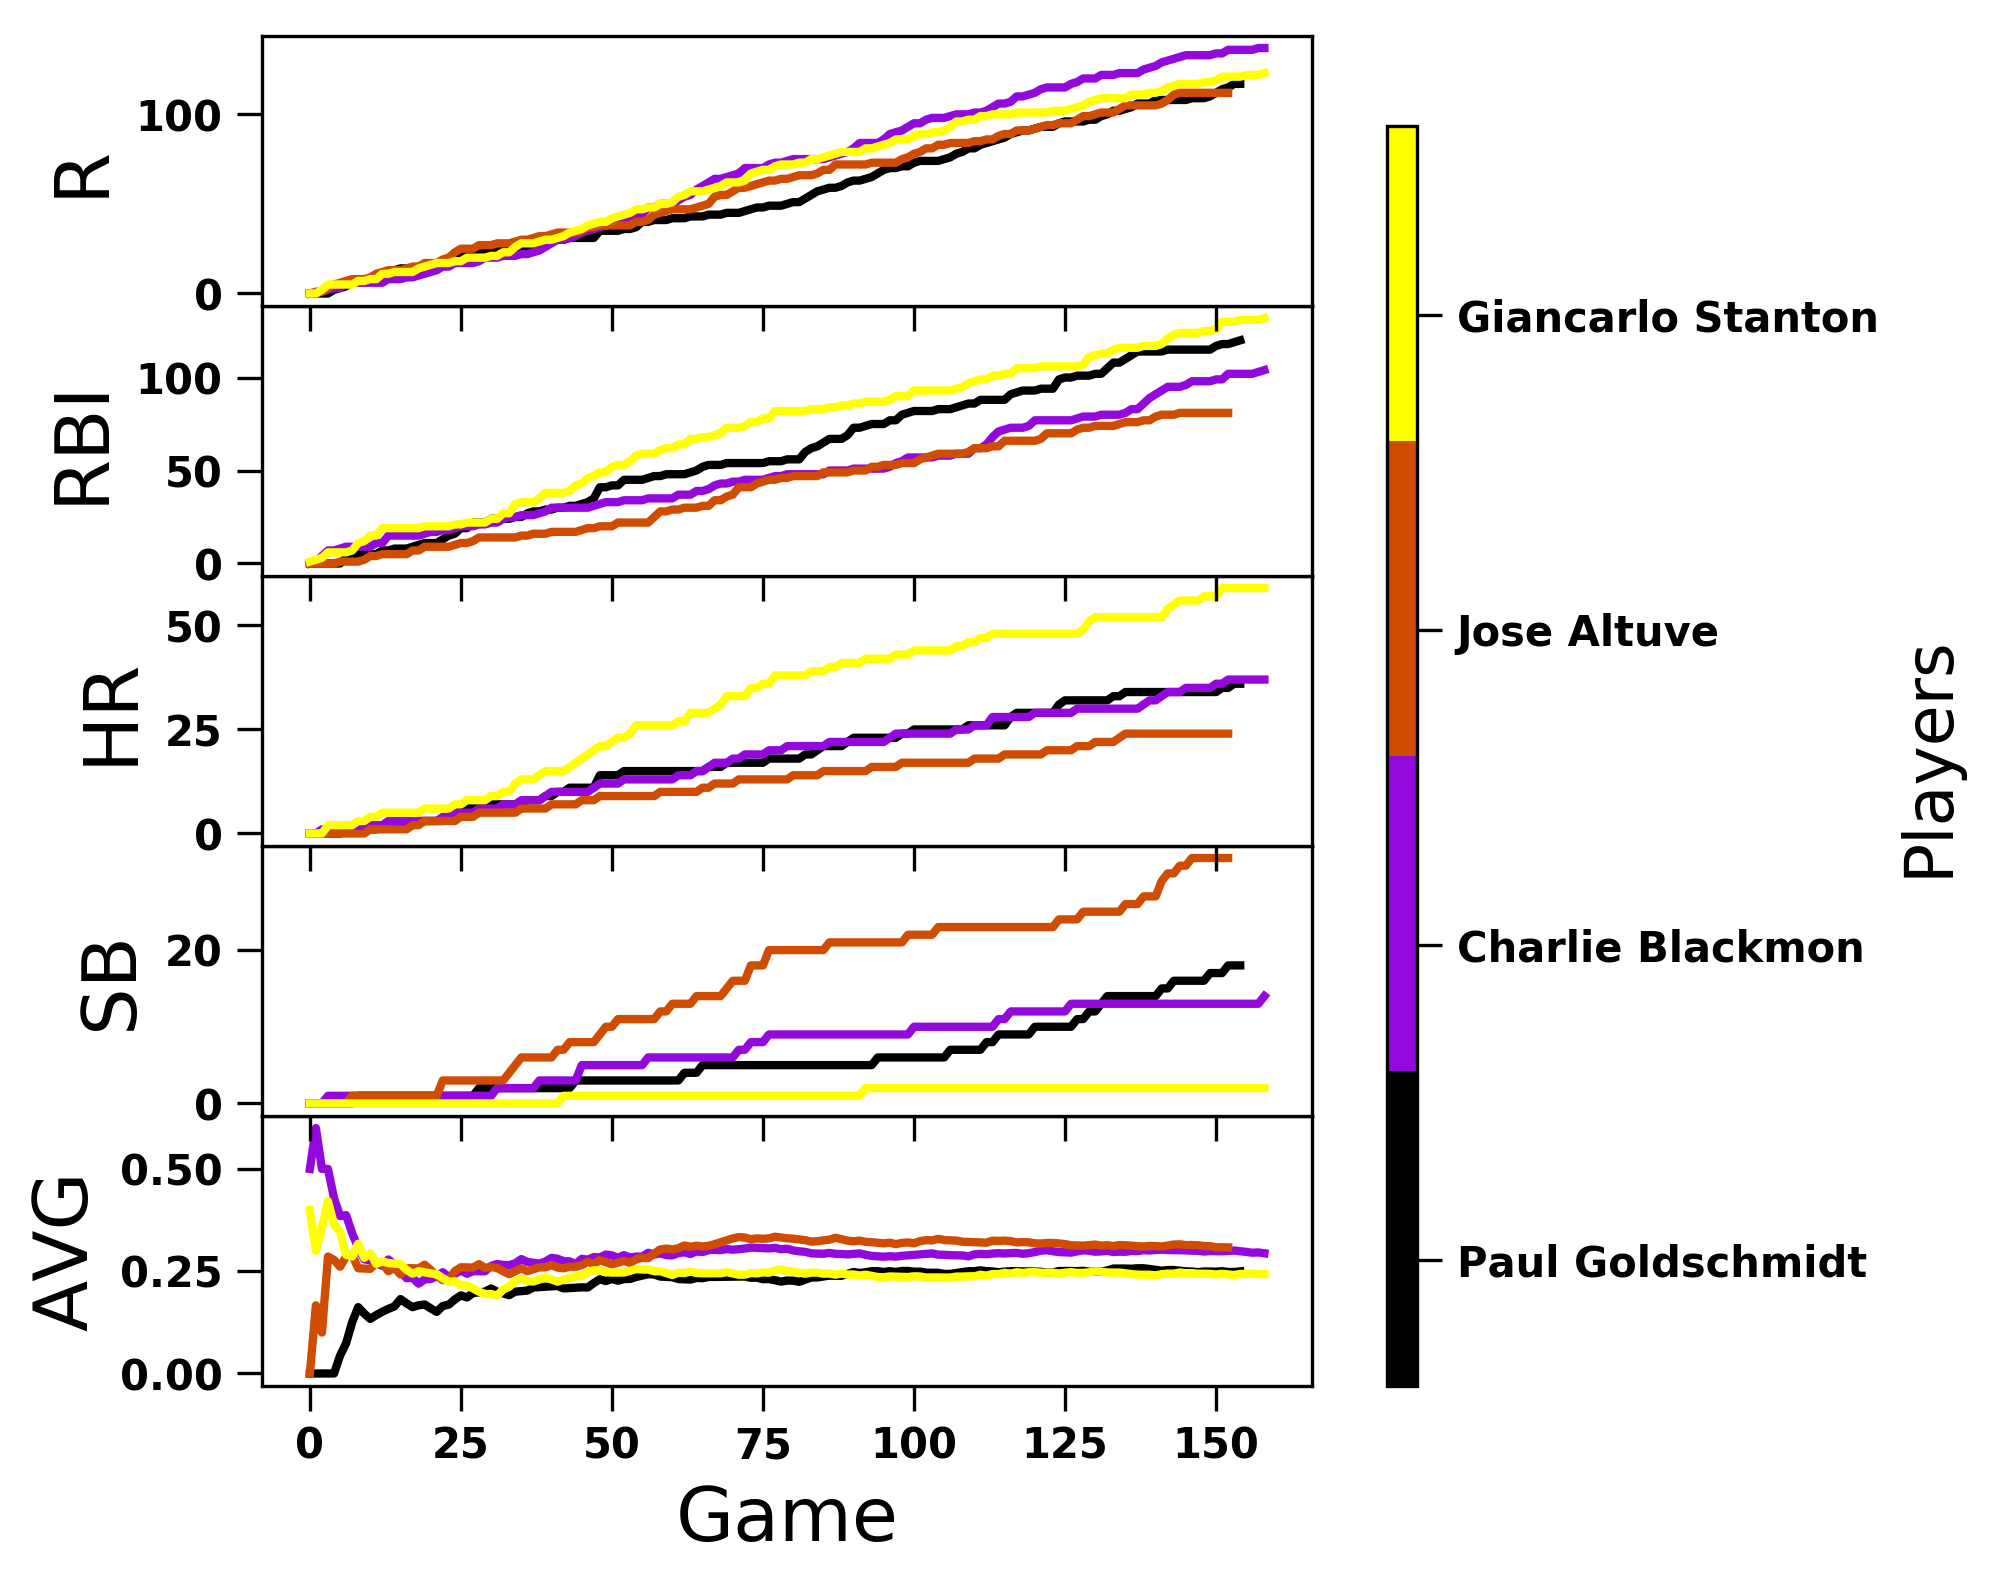

In [16]:
plot_plist(plist,PVals)

In [17]:
# draw 6 random games from the sample and see how RBIs go

nsamp = 10000

MCarlo = {}
MCarlo['HR'] = {}
MCarlo['R'] = {}
MCarlo['RBI'] = {}
MCarlo['SB'] = {}




for player in plist:
    
     
    
    start = np.random.randint(0,len(PVals[player]['hr'])-6,nsamp)
    
    MCarlo['HR'][player] = np.mean(np.array([np.sum(PVals[player]['hr'][startx:startx+6]) for startx in start]))
    MCarlo['R'][player] = np.mean(np.array([np.sum(PVals[player]['r'][startx:startx+6]) for startx in start]))
    MCarlo['RBI'][player] = np.mean(np.array([np.sum(PVals[player]['rbi'][startx:startx+6]) for startx in start]))
    MCarlo['SB'][player] = np.mean(np.array([np.sum(PVals[player]['sb'][startx:startx+6]) for startx in start]))



    




In [18]:
print MCarlo['HR']
print MCarlo['R']
print MCarlo['RBI']
print MCarlo['SB']

{'Paul Goldschmidt': 1.3965000000000001, 'Jose Altuve': 0.99080000000000001, 'Giancarlo Stanton': 2.29, 'Charlie Blackmon': 1.4301999999999999}
{'Paul Goldschmidt': 4.5193000000000003, 'Jose Altuve': 4.4964000000000004, 'Giancarlo Stanton': 4.6940999999999997, 'Charlie Blackmon': 5.3192000000000004}
{'Paul Goldschmidt': 4.7122999999999999, 'Jose Altuve': 3.2951999999999999, 'Giancarlo Stanton': 5.0345000000000004, 'Charlie Blackmon': 3.8799000000000001}
{'Paul Goldschmidt': 0.69350000000000001, 'Jose Altuve': 1.2827, 'Giancarlo Stanton': 0.078200000000000006, 'Charlie Blackmon': 0.48980000000000001}
